(ch-sampling-distribution)=
# 표본분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

표본 분포의 주요 개념을 소개한다.

- 표본평균의 분포
- 중심극한정리
- 큰 수의 법칙

**캘리포니아 주택가격 데이터셋**

캘리포니아 주택가격 데이터셋을 계속해서 활용한다.

- 캘리포니아 주택가격 데이터셋

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- 가구중위소득과 주택중위가격만 활용

In [8]:
housing = housing.loc[:, ['median_income', 'median_house_value']]
housing

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


- 이상치 제거: 중위주택가격이 50만을 초과하는 경우 삭제. 이후 인덱스 초기화

In [9]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]
housing = housing.reset_index(drop=True)
housing.index.name = 'district'
housing

,median_income,median_house_value
district,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
19670,1.5603,78100.0
19671,2.5568,77100.0
19672,1.7000,92300.0


In [10]:
total_number = housing.shape[0]
total_number

19675

## 확률밀도

In [13]:
median_income = housing['median_income']

Text(0, 0.5, 'Probability Density')

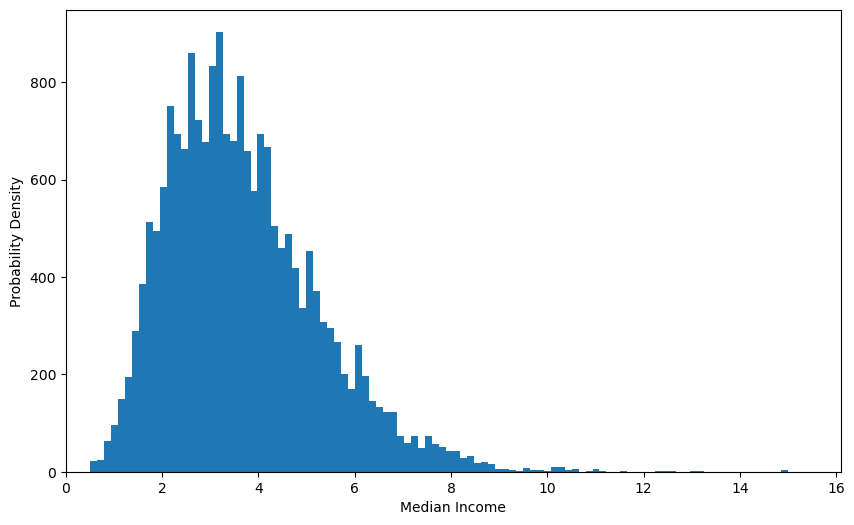

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
median_income.hist(bins=100, density=False, grid=False)

ax.set_xlim(0, 16.1)
# ax.set_ylim(0, 0.33)
ax.set_xlabel('Median Income')
ax.set_ylabel('Probability Density')

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing

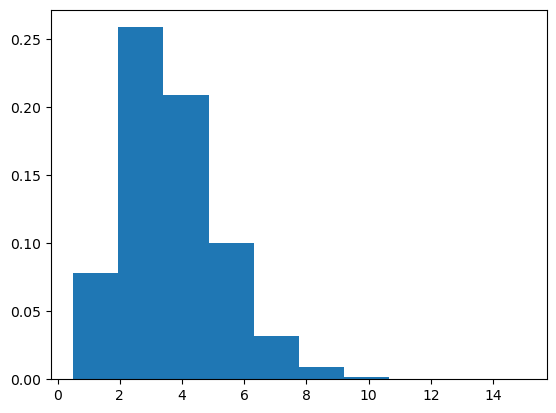

In [66]:
x, _, _ = plt.hist(median_income, density=True)

In [67]:
len(x)

10

In [68]:
x

array([7.830589e-02, 2.588932e-01, 2.087690e-01, 1.002484e-01,
       3.186216e-02, 9.183592e-03, 1.752594e-03, 3.154669e-04,
       2.103113e-04, 1.051556e-04])

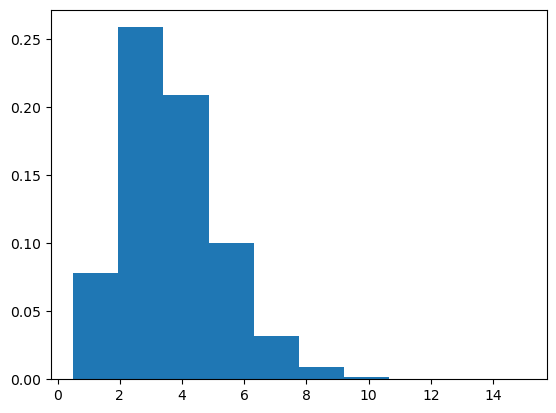

In [73]:
y, bins, _ = plt.hist(median_income, bins=10, density=True)

In [74]:
y

array([7.830589e-02, 2.588932e-01, 2.087690e-01, 1.002484e-01,
       3.186216e-02, 9.183592e-03, 1.752594e-03, 3.154669e-04,
       2.103113e-04, 1.051556e-04])

In [77]:
np.diff(bins)

array([1.45002, 1.45002, 1.45002, 1.45002, 1.45002, 1.45002, 1.45002,
       1.45002, 1.45002, 1.45002])

In [78]:
(y * np.diff(bins)).sum()

1.000000

Text(0, 0.5, 'Relative Freuquency')

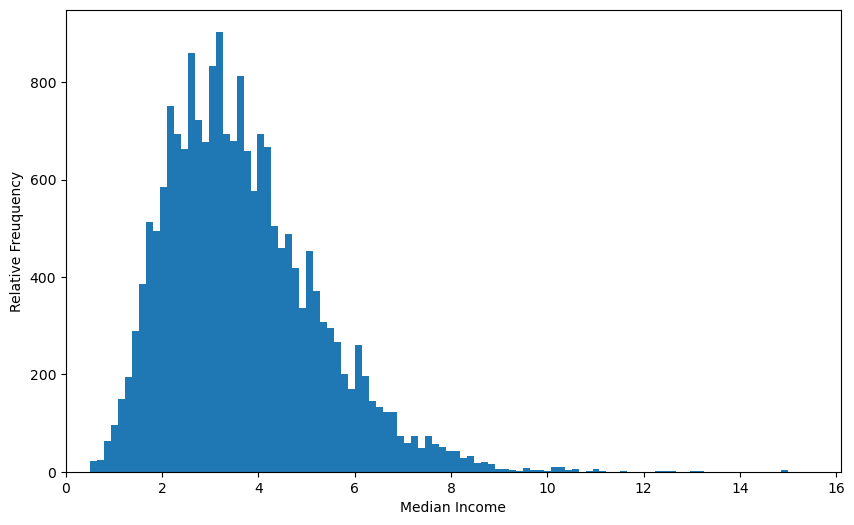

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
median_income.hist(bins=100, density=False, grid=False)

ax.set_xlim(0, 16.1)
# ax.set_ylim(0, 0.33)
ax.set_xlabel('Median Income')
ax.set_ylabel('Relative Freuquency')

## 표본평균의 분포

**10% 표본추출**

In [31]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling

,median_income,median_house_value
district,,
15377,4.1116,187500.0
282,5.9849,371000.0
5346,2.8106,184400.0
12420,1.8589,144000.0
8840,4.3182,252700.0
...,...,...
16738,2.5804,216300.0
15067,2.3887,337500.0
13340,1.7062,86800.0


**표본추출 반복**

아래 코드는 무작위 추출을 5번 반복한다.

In [32]:
for i in range(5):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    print(f"{i+1}번째 표본추출:")
    print(sampling.mean())
    print()

1번째 표본추출:
median_income              3.679355
median_house_value    193633.197763
dtype: float64

2번째 표본추출:
median_income              3.657730
median_house_value    192268.378241
dtype: float64

3번째 표본추출:
median_income              3.686453
median_house_value    194232.130147
dtype: float64

4번째 표본추출:
median_income              3.702366
median_house_value    197300.254194
dtype: float64

5번째 표본추출:
median_income              3.683035
median_house_value    193355.210981
dtype: float64



In [33]:
sampling

,median_income,median_house_value
district,,
5212,3.3955,225000.0
17995,6.8872,305200.0
8700,5.1163,233200.0
737,3.4722,135400.0
11647,2.4554,89400.0
...,...,...
6484,3.5875,309300.0
11136,3.0870,196900.0
19440,4.9234,241400.0


아래 코드는 무작위 추출 10,000 반복하면서 표본평균을 모은다.

In [34]:
sampling_count = 10000

income_mean = np.zeros(sampling_count)

for i in range(sampling_count):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    income_mean[i] = sampling['median_income'].mean()

모아진 10,000개의 표본평균 자체로 새로운 분포를 가지며 표본평균의 평균값은 다음과 같다.

In [35]:
np.mean(income_mean)

3.676986

표본평균의 분산이 매우 작다.

In [36]:
np.var(income_mean)

0.001269

모집단의 평균값과 표본평균의 평균값이 매우 유사하다.

In [37]:
housing['median_income'].mean()

3.676717

## 연습문제

참고: [(연습) 표본 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-sampling_distribution.ipynb)